<a href="https://colab.research.google.com/github/igedemadepradnyaairlangga/Dataanalitycs/blob/master/TopicLabeledNewsDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Klasifikasi Teks
- Nama: I Gede Made Pradnya Airlangga
- Email: pradnya.airlangga@gmail.com
- Id Dicoding: I Gede Made Pradnya Airlangga

Sumber Dataset : https://www.kaggle.com/datasets/dbs800/global-news-dataset

## Menentukan Pertanyaan Bisnis

- Bagaimana Rata - Rata Sentiment terhadap Berita Populer dari berbagai sumber, wilayah, negara, dan benua per harinya?
- Bagaimana rata-rata Sentimen terhadap Berita Populer berdasarkan wilayah
- Berapa Kira - kira jumlah berita yang di publish setiap harinya?

## Menghubungkan ke dataset yang ada di google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [ ]:
!ls

 0t08v9bAaA0mXGCQ.png		 rockpaperscissors
 alldata_1_for_kaggle.csv	 rock_paper_scissors_final_model.h5
 amazon_prime_titles.csv	 rock_paper_scissors_model.h5
 best_model.h5			'Salinan amazon_prime_titles.csv'
 combined_dataset.csv		 testkt2.csv
 day.csv			 testkt.csv
'e-shop clothing 2008.csv'	 train.csv
'e-shop clothing 2008.csv.zip'	 trainkt2.csv
 hour.csv			 trainkt.csv
 kaggle.json			 udemy_output_All_Finance__Accounting_p1_p626.csv
 klasifikasiteks		 vectorizer.pkl
 Mall_Customers.csv		 world_news_in_month.csv
 OdfDTwgPVdW9XbE7.png


## Menyaipkan semua library yang dibutuhkan

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import re
import tensorflow as tf
import os
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

## Menyaipkan semua library yang dibutuhkan

In [ ]:
# Mengimpor dataset dari file CSV
file_path = '/content/drive/MyDrive/Kaggle/world_news_in_month.csv'
df = pd.read_csv('world_news_in_month.csv', encoding='ISO-8859-1')

# Menampilkan informasi awal dari DataFrame
print("Info:")
print(df.info())

print("\nHead:")
print(df.head())

print("\nColumns:")
print(df.columns)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93613 entries, 0 to 93612
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      93613 non-null  int64 
 1   text       93613 non-null  object
 2   name       93613 non-null  object
 3   Date       93613 non-null  object
 4   sentiment  93613 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.6+ MB
None

Head:
   index                                               text name       Date  \
0      1  Theresa May has struck a deal with Brussels th...   UK  11/1/2018   
1      2  The agreement may give UK firms continued acce...   UK  11/1/2018   
2      3  Nobody knows when, but the Brexit secretary, D...   UK  11/1/2018   
3      4  There's no shame in asking voters to express t...   UK  11/1/2018   
4      5  Dominic Raab warns that "obstacles remain" but...   UK  11/1/2018   

   sentiment  
0          0  
1          1  
2          0  
3          0  
4

In [ ]:
# Periksa Missing Values
missing_values = df.isnull().sum()
print("Jumlah Missing Values per Kolom:")
print(missing_values)

Jumlah Missing Values per Kolom:
index        0
text         0
name         0
Date         0
sentiment    0
dtype: int64


In [ ]:
# Cek dan hapus duplikat
df = df.drop_duplicates()

In [ ]:
# Tangani nilai-nilai yang hilang jika diperlukan
df = df.dropna()

In [ ]:
#Pembersihan Teks
#menghapus karakter khusus dan mengonversi teks ke huruf kecil)
df['text'] = df['text'].str.lower().replace('[^a-zA-Z0-9\s]', '', regex=True)

In [ ]:
# Melihat hasil setelah pembersihan
print("Info setelah pembersihan:")
print(df.info())

Info setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 93613 entries, 0 to 93612
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      93613 non-null  int64 
 1   text       93613 non-null  object
 2   name       93613 non-null  object
 3   Date       93613 non-null  object
 4   sentiment  93613 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 4.3+ MB
None


##**Membuat Model Sequential dengan LSTM dan Embedding:**

In [ ]:
# Membaca dataset train yang sudah dibersihkan
df = pd.read_csv('world_news_in_month.csv', encoding='ISO-8859-1')

In [ ]:
# Definisi vocab_size dan oov_tok
vocab_size = 1000
oov_tok = "<OOV>"

In [ ]:
# Menampilkan informasi awal dari DataFrame
print("Info:")
print(df.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93613 entries, 0 to 93612
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      93613 non-null  int64 
 1   text       93613 non-null  object
 2   name       93613 non-null  object
 3   Date       93613 non-null  object
 4   sentiment  93613 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.6+ MB
None


In [ ]:
# Mengonversi kolom tanggal menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Mengonversi kolom sentimen menjadi tipe data integer (jika belum)
df['sentiment'] = df['sentiment'].astype(int)

In [ ]:
df.tail()

,index,text,name,Date,sentiment
93608,93609,L'Agence nationale de sécurité du médicament e...,France,2018-10-26,0
93609,93610,Les députés ont récemment adopté un amendement...,France,2018-10-26,0
93610,93611,La mesure doit être débattue par les députés a...,France,2018-10-26,0
93611,93612,La taille et la forme du canal pelvi-génital d...,France,2018-10-26,0
93612,93613,SANTÉ - Le corps des femmes recèle encore de n...,France,2018-10-26,0


In [ ]:
# Tokenisasi dan padding
text_data = df['text'].tolist()
sentiments = df['sentiment'].values

In [ ]:
# Membagi dataset menjadi data pelatihan dan validasi
teks_latih, teks_test, label_latih, label_test = train_test_split(text_data, sentiments, test_size=0.2)

In [ ]:
# Tokenisasi dan padding
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(teks_latih)
tokenizer.fit_on_texts(teks_test)
word_index = tokenizer.word_index
sekuens_latih = tokenizer.texts_to_sequences(teks_latih)
sekuens_test = tokenizer.texts_to_sequences(teks_test)
padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [ ]:
# Padding sequence agar memiliki panjang yang sama
max_length = max(max(len(seq) for seq in sekuens_latih), max(len(seq) for seq in sekuens_test))
padded_latih = pad_sequences(sekuens_latih, maxlen=max_length, padding='post')
padded_test = pad_sequences(sekuens_test, maxlen=max_length, padding='post')

In [ ]:
#Callback to avoid overfitting
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah lebih dari 95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# Menghitung class weights untuk menangani ketidakseimbangan kelas
class_weights = compute_class_weight('balanced', classes=[0, 1], y=label_latih)
class_weights = dict(enumerate(class_weights))

In [ ]:
# Membuat model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64),
    LSTM(84),
    Dense(148, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Untuk klasifikasi biner
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Menggunakan EarlyStopping callback
callbacks = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Melatih model
history = model.fit(padded_latih, label_latih, epochs=5,
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/5
2341/2341 - 433s - loss: 0.4486 - accuracy: 0.7898 - val_loss: 0.4449 - val_accuracy: 0.7901 - 433s/epoch - 185ms/step
Epoch 2/5
2341/2341 - 444s - loss: 0.4343 - accuracy: 0.7898 - val_loss: 0.4399 - val_accuracy: 0.7901 - 444s/epoch - 190ms/step
Epoch 3/5
2341/2341 - 451s - loss: 0.4197 - accuracy: 0.7900 - val_loss: 0.4396 - val_accuracy: 0.7889 - 451s/epoch - 193ms/step
Epoch 4/5
2341/2341 - 442s - loss: 0.4062 - accuracy: 0.7939 - val_loss: 0.4489 - val_accuracy: 0.7889 - 442s/epoch - 189ms/step
Epoch 5/5
2341/2341 - 442s - loss: 0.3941 - accuracy: 0.8002 - val_loss: 0.4384 - val_accuracy: 0.7885 - 442s/epoch - 189ms/step


In [ ]:
# Evaluasi model pada data validasi
loss, accuracy = model.evaluate(padded_test, label_test)
print(f'\nAccuracy on validation set: {accuracy * 100:.2f}%')

586/586 [==============================] - 31s 52ms/step - loss: 0.4384 - accuracy: 0.7885

Accuracy on validation set: 78.85%


In [ ]:
# Menyimpan model ke file
model.save('model_sentiment.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Bagaimana Rata - Rata Sentiment terhadap Berita Populer dari berbagai sumber, wilayah, negara, dan benua per harinya?**

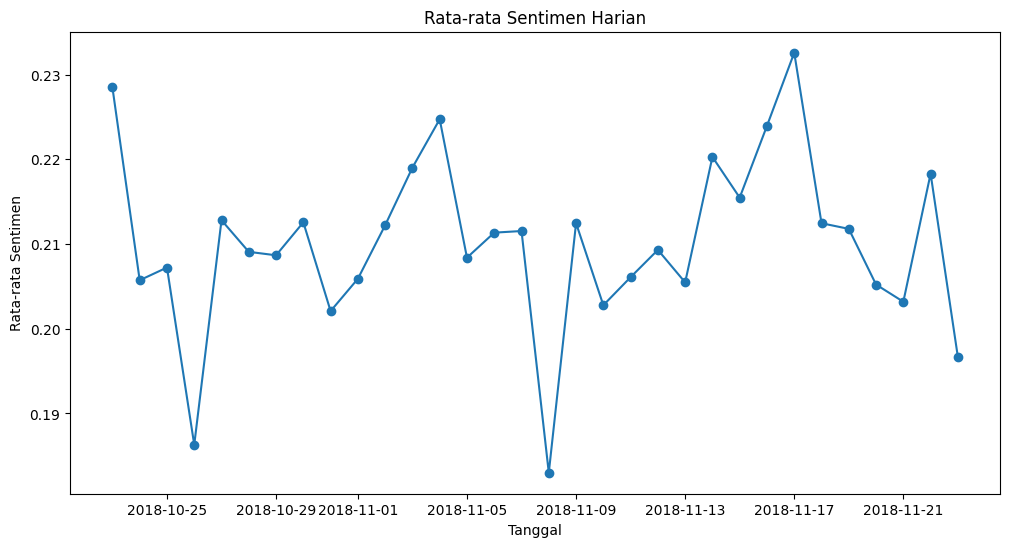

In [ ]:
# Mengonversi kolom 'Date' menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'])

# Menghitung rata-rata sentimen harian
daily_sentiment = df.groupby(df['Date'].dt.date)['sentiment'].mean()

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', linestyle='-')
plt.title('Rata-rata Sentimen Harian')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Sentimen')
plt.show()


**Bagaimana rata-rata Sentimen terhadap Berita Populer berdasarkan wilayah**

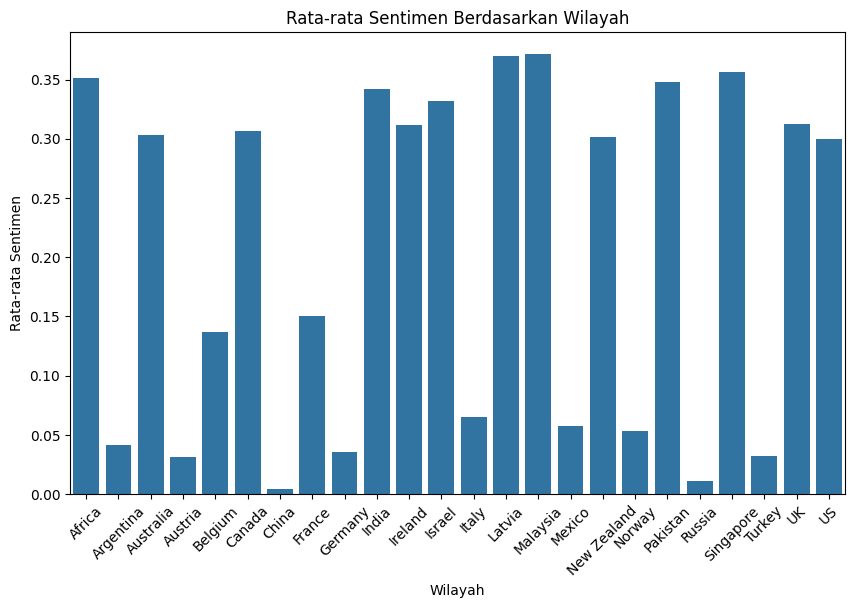

In [ ]:
# Menghitung rata-rata sentimen berdasarkan wilayah
average_sentiment_by_region = df.groupby('name')['sentiment'].mean()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=average_sentiment_by_region.index, y=average_sentiment_by_region.values)
plt.title('Rata-rata Sentimen Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Rata-rata Sentimen')
plt.xticks(rotation=45)
plt.show()


**Berapa Kira - kira jumlah berita yang di publish setiap harinya?**

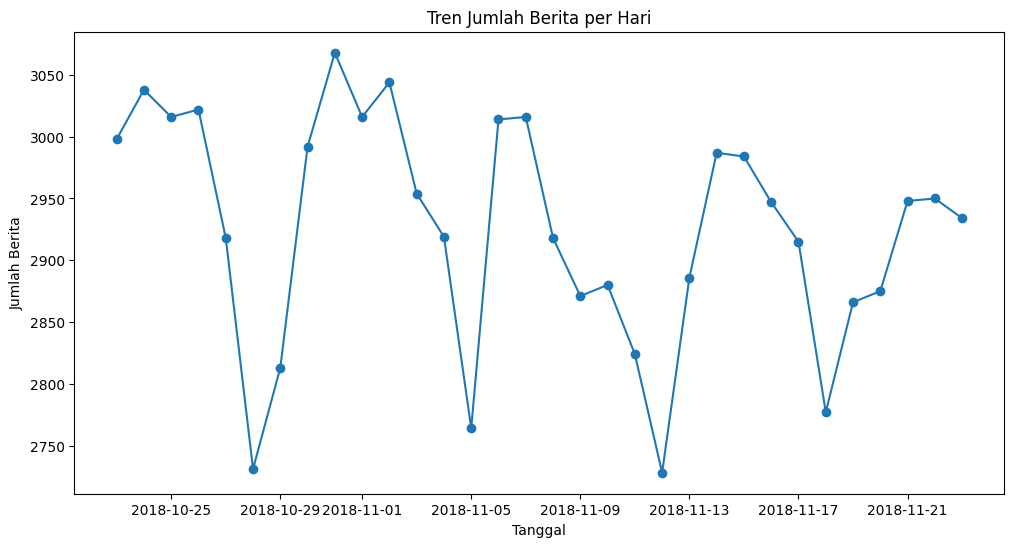

In [ ]:
# Mengonversi kolom 'Date' menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'])

# Menghitung jumlah berita per hari
daily_news_count = df.groupby(df['Date'].dt.date)['index'].count()

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(daily_news_count.index, daily_news_count.values, marker='o', linestyle='-')
plt.title('Tren Jumlah Berita per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Berita')
plt.show()
